<a href="https://colab.research.google.com/github/usintec/Airpass-RNN-Forecast/blob/master/notebooks/airpass_rnn_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting with Recurrent Neural Networks (RNN)

## Introduction

In this lab, we will explore how to use **Recurrent Neural Networks (RNNs)** to perform **time series forecasting**. RNNs are particularly powerful for sequential data, where the order of the data points matters. In time series analysis, past information is crucial for predicting future values, and RNNs are designed to capture these dependencies.

We will work with the **Airline Passengers dataset**, a classic time series dataset that contains monthly totals of international airline passengers from 1949 to 1960. The goal is to predict future passenger numbers based on previous months' data.

### Key Concepts

1. **Recurrent Neural Networks (RNNs)**:
   - RNNs are a type of neural network architecture where connections between nodes form a directed graph along a temporal sequence.
   - They allow information to persist, making them ideal for tasks that involve sequential data, such as time series forecasting, speech recognition, and natural language processing.

2. **Time Series Forecasting**:
   - Time series forecasting involves predicting future values in a dataset based on previously observed values.
   - In this lab, we use a sliding window approach where past observations (e.g., the number of passengers over the previous 12 months) are used to predict the next month's passenger count.


### Objectives
- Load and preprocess the airline passengers time series dataset.
- Create sequences of past data to use as input features for the RNN.
- Train an RNN model on the training set and evaluate its performance on the test set.
- Visualize the **train data**, **test data**, and **predicted test data**

### Dataset
The dataset used in this lab contains monthly totals of international airline passengers from 1949 to 1960. The dataset will be normalized before training, and we will use a sliding window of past months' data to predict the next month.

### Model Architecture
We will use a simple **RNN** with one hidden layer consisting of 50 units. The architecture is as follows:
- **Input layer**: Processes the sequences of past data.
- **RNN layer**: A SimpleRNN layer with 50 units to capture the temporal dependencies.
- **Dense layer**: A fully connected layer that outputs the predicted number of passengers for the next time step.



Text(0, 0.5, 'Number of Passengers')

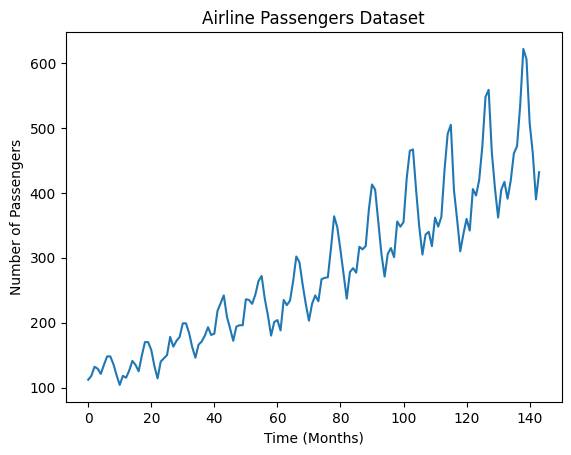

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM

# Load the dataset
url = 'https://raw.githubusercontent.com/usintec/Airpass-RNN-Forecast/master/data/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])  # Only load the 'Passengers' column

plt.plot(data)
plt.title('Airline Passengers Dataset')
plt.xlabel('Time (Months)')
plt.ylabel('Number of Passengers')

## Preprocessing the Data

Before training our Recurrent Neural Network (RNN), it's essential to preprocess the data properly. In this section, we will apply normalization and transform the dataset into sequences suitable for time series prediction.

### Normalization

Time series data often has varying ranges and units, which can affect the performance of machine learning models. To bring all the data into a uniform range, we will use **MinMaxScaler** from `scikit-learn`. This scaler normalizes the data to a range between 0 and 1, which ensures that the RNN processes inputs consistently and can learn effectively.


### Creating Sequences

RNNs require data to be structured as sequences where each sequence consists of a fixed number of time steps (past observations) used to predict the next value in the series. We define a function `create_sequences` that splits the time series data into sequences of a specified length (in this case, 12 months) for training and testing.

- **Inputs (`x`)**: Sequences of past data points (e.g., previous 12 months of data).
- **Outputs (`y`)**: The next data point after each sequence, which the model will try to predict.


### Time Step Setting

For this example, we set the time step to 12, which means the RNN will look at the previous 12 months' data to predict the next month's value.

### Reshaping the Input

RNNs expect input data to be in a 3D format: **[samples, time steps, features]**. Here, we reshape the data accordingly:
- **Samples**: Each individual sequence of data.
- **Time Steps**: The number of past time steps used (12 months in this case).
- **Features**: The number of features at each time step (1 in this case, as we are predicting the number of passengers).


In [9]:
# Preprocessing the data
# Normalize the dataset (MinMaxScaler scales the data to the range [0,1])
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create sequences from the dataset
def create_sequences(data, time_step):
    x, y = [], []
    for i in range(len(data) - time_step):
        x.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(x), np.array(y)

# Set time step (number of months to use for prediction)
time_step = 12
X, y = create_sequences(scaled_data, time_step)

# Reshape input to be [samples, time steps, features] which is required by RNN
X = X.reshape((X.shape[0], X.shape[1], 1))

In [10]:
# Split the data into training and test sets (no need for a separate holdout set)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [11]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=False, input_shape=(time_step, 1)))  # SimpleRNN layer with 50 units
model.add(Dense(1))  # Output layer to predict one value (the number of passengers)

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs = 50
batch_size = 16

print("Training the model...")
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test data
print("Evaluating the model on the test set...")
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

Training the model...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0407 - val_loss: 0.0233
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0060 - val_loss: 0.0225
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - val_loss: 0.0140
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036 - val_loss: 0.0095
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0027 - val_loss: 0.0076
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0017 - val_loss: 0.0058
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0015 - val_loss: 0.0070
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0010 - val_loss: 0.0049
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.5563e-04 - val_loss: 0.0053
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0011 - val_loss: 0.0054
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.7255e-04 - val_loss: 0.0052
Epoc

In [12]:
# Predict future values using the test set
predicted_test = model.predict(X_test)

# Inverse transform the predicted values back to the original scale
predicted_test = scaler.inverse_transform(predicted_test.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

# Inverse transform the training set to its original values
train_data_plot = scaler.inverse_transform(scaled_data[:train_size])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


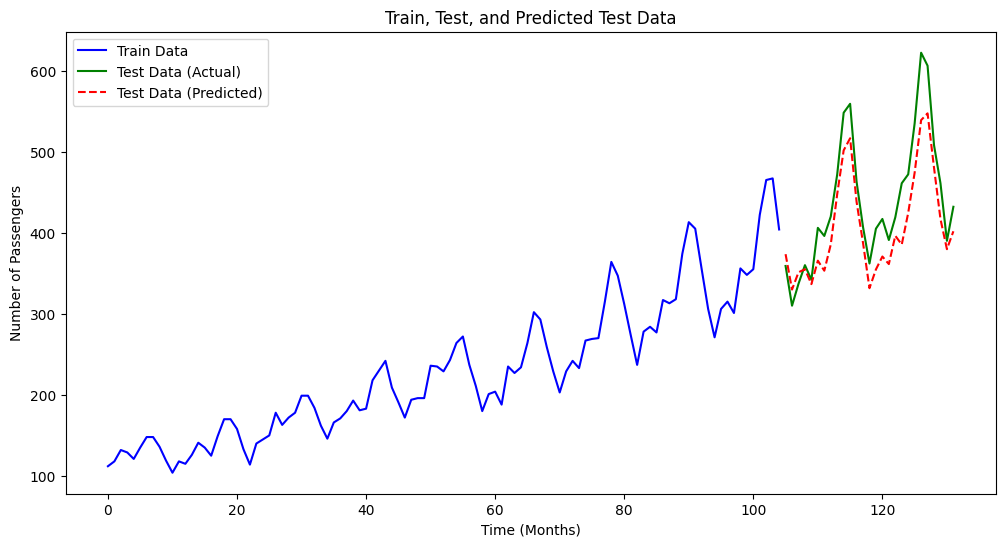

In [13]:
# Prepare indexes to plot correctly
train_index = np.arange(0, len(train_data_plot))
test_index = np.arange(len(train_data_plot), len(train_data_plot) + len(y_test_actual))

# Plot the train set, test set, and predicted test set
plt.figure(figsize=(12, 6))
plt.plot(train_index, train_data_plot, label='Train Data', color='blue')
plt.plot(test_index, y_test_actual, label='Test Data (Actual)', color='green')
plt.plot(test_index, predicted_test, label='Test Data (Predicted)', color='red', linestyle='dashed')
plt.xlabel('Time (Months)')
plt.ylabel('Number of Passengers')
plt.title('Train, Test, and Predicted Test Data')
plt.legend()
plt.show()